# Project description

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. <br><br>
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

# Table of Contents:

1. [Open the data file and study the general information](#Step-1.-Open-the-data-file-and-study-the-general-information)
2. [Prepare the data](#Step-2.-Prepare-the-data)
    * [Graphical Analysis](#Graphical-analysis)
    * [Group the data monthly by users](#For-each-user,-find:)<br><br>
    
3. [Analyze the data](#Step-3.-Analyze-the-data)
4. [Test the hypotheses](#Step-4.-Test-the-hypotheses)
5. [Write an overall conclusion](#Step-5.-Write-an-overall-conclusion)

In [1]:
# libraries cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st

# Step 1. Open the data file and study the general information


In [2]:
# Importing datasets

try: # open locally
    df_calls = pd.read_csv('datasets/megaline_calls.csv')
    df_internet = pd.read_csv('datasets/megaline_internet.csv')
    df_messages = pd.read_csv('datasets/megaline_messages.csv')
    df_plans = pd.read_csv('datasets/megaline_plans.csv')
    df_users = pd.read_csv('datasets/megaline_users.csv')
    
except: # open on hub
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
    df_users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
datasets = [df_calls, df_internet, df_messages, df_plans, df_users] 

# loop for looking at info's of all the datasets at once
for dataset in datasets:
    print(dataset.info())
    print('\n==============================\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-N

#### <font color = 'blue'>Notes:</font>

I see empty values only in one column: 'churn_date' in df_users. As explained in project description, 'churn_date' values reflect when users left the company. So all the users who continue using one of the plans didn't leave and don't have no churn date.

In [4]:
datasets[0].head() # calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
datasets[0].describe() #calls numerical columns

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
datasets[0].describe(include = [object]) #calls object columns

,id,call_date
count,137735,137735
unique,137735,351
top,1120_381,2018-12-27
freq,1,1091


In [7]:
datasets[1].head() # internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
datasets[1].describe() #internet numerical columns

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [9]:
datasets[1].describe(include = [object]) #internet object columns

,id,session_date
count,104825,104825
unique,104825,351
top,1223_168,2018-12-24
freq,1,851


In [10]:
datasets[2].head() # messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [11]:
datasets[2].describe() #messages numerical columns

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [12]:
datasets[2].describe(include = [object]) #messages object columns

,id,message_date
count,76051,76051
unique,76051,351
top,1120_381,2018-12-28
freq,1,702


In [13]:
datasets[3] # plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
datasets[4].head() # users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
datasets[4].describe() #users numerical columns

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [16]:
datasets[4].describe(include = [object]) #users object columns

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Leonila,Brock,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
freq,3,3,80,5,339,3


<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

# Step 2. Prepare the data

* Convert the data to the necessary types
* Find and eliminate errors in the data

Explain what errors you found and how you removed them. Note: many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.

#### <font color = 'blue'>Notes:</font>

To compare plans and check which one brings more revenue, I want to finish this section with 3 neat and organized tables: calls, messages and internet. To all of them I want to add 'plan' column and also membership lenghth period (which would indicate if the customer had used the plan for the whole period my data accounts for, or only for part of it - so I will know to make adjustments if I will have to compare revenues by some time period). The membership length would be represented in months, or I will add two columns, one in days and other in months, for easier calculation of revenue from each customer per time period.


##### So I am going to start with processing the date columns first:
 * Check lowest and highest date values in the datasets to determine which period of time are we talking to.
 * Fill in empty values in 'churn_date' with latest date I found - this would be 'period end date'.
 * Convert all date columns to datetime format.
 * Calculate membership length by substracting earliest date I have ('period start date') or 'reg_date' (the latest of two) from the updated 'churn_date' column.

In [17]:
print('The earliest call date: {}'.format(df_calls.call_date.min()))
print('The earliest message date: {}'.format(df_messages.message_date.min()))
print('The earliest session date: {}'.format(df_internet.session_date.min()))
print()
print('The latest call date: {}'.format(df_calls.call_date.max()))
print('The latest message date: {}'.format(df_messages.message_date.max()))
print('The earliest session date: {}'.format(df_internet.session_date.max()))

The earliest call date: 2018-01-15
The earliest message date: 2018-01-15
The earliest session date: 2018-01-15

The latest call date: 2018-12-31
The latest message date: 2018-12-31
The earliest session date: 2018-12-31


In [18]:
# The data period start and end days are the same.
# I will save them as a separate values:

start_date = df_calls.call_date.min()
end_date = df_calls.call_date.max()

In [19]:
# fill missing 'churn_date' values:
df_users.churn_date = df_users.churn_date.fillna(end_date)

#check the result:
df_users.churn_date.isna().sum()

0

In [20]:
# replace all 'reg_date' values earlier than 'start_date' with the 'start_date':
for value in df_users.query('reg_date < @start_date').reg_date:
    df_users.reg_date.replace({value: start_date}, inplace = True)

# check if worked:
df_users.query('reg_date < @start_date').reg_date.unique()

array([], dtype=object)

In [21]:
# convert date columns to datetime format
df_calls.call_date = pd.to_datetime(df_calls.call_date, format = '%Y-%m-%d')
df_messages.message_date = pd.to_datetime(df_messages.message_date, format = '%Y-%m-%d')
df_internet.session_date = pd.to_datetime(df_internet.session_date, format = '%Y-%m-%d')
df_users.reg_date = pd.to_datetime(df_users.reg_date, format = '%Y-%m-%d')
df_users.churn_date = pd.to_datetime(df_users.churn_date, format = '%Y-%m-%d')

In [22]:
# adding days column to users:
df_users['total_days'] = (df_users['churn_date'] - df_users['reg_date']).dt.days + 1

# check days column:
df_users.sort_values('total_days').head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_days
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2018-12-31,1
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2018-12-31,1
108,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,2018-12-31,2
323,1323,Pamelia,Atkins,42,"Baltimore-Columbia-Towson, MD MSA",2018-12-30,surf,2018-12-31,2
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,2018-12-31,3


In [23]:
# adding months column:
df_users['total_months'] = df_users.total_days / 30

# rounding months column up (because some of the months values may be very small fraction, for example 1/30)
df_users.total_months = df_users.total_months.apply(math.ceil)

# check the result:
df_users.sort_values('total_months', ascending = False).head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_days,total_months
431,1431,Napoleon,Burt,74,"Sacramento–Roseville–Folsom, CA MSA",2018-01-28,surf,2018-12-31,338,12
418,1418,Hal,Barnes,40,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,2018-12-31,347,12
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,2018-12-31,339,12
277,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-02,surf,2018-12-31,333,12
439,1439,Moses,Cabrera,28,"Riverside-San Bernardino-Ontario, CA MSA",2018-01-15,surf,2018-12-31,351,12


#### <font color = 'blue'>Notes:</font>

Now I am going to check 0 values in calls length. If those are really missing calls, they are usually not charged (and I don't see mention about such a charge in task description and plan costs), so they won't affect the revenues. But if I include them in calculations, they may lower average call costs and I may get inaccurate results.

In [24]:
# check the share of 0 duration calls
df_calls.query('duration == 0').duration.count() / len(df_calls)

0.1948233927469416

#### <font color = 'blue'>Notes:</font>

Almost one fifth of overall calls are missed, it is a very large piece of data. Before making a decision, first I want to see what is the share of those calls in both data plans. 

In [25]:
# join relevant columns to calls, messages and internet datasets

# list of columns in users dataset I want to join:
user_columns_to_join = ['user_id', 'plan', 'total_days', 'total_months']

calls_updated = df_calls.merge(df_users[user_columns_to_join], on = 'user_id')
messages_updated = df_messages.merge(df_users[user_columns_to_join], on = 'user_id')
internet_updated = df_internet.merge(df_users[user_columns_to_join], on = 'user_id')

In [26]:
# Compare a share of missed calls in both plans

calls_updated.query('duration == 0').groupby('plan').duration.count() / calls_updated.groupby('plan').duration.count()

plan
surf        0.193519
ultimate    0.197636
Name: duration, dtype: float64

#### <font color = 'blue'>Notes:</font>

The share of missing calls is the same in both plans, so it won't affect total revenues. I believe I can safely drop them.
Also I will convert data types where needed, and then proceed to graphical analysis.

In [27]:
# drop all the missed calls
calls_updated = calls_updated.query('duration > 0')

# check which columns I need to convert in updated datasets
calls_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            110901 non-null  object        
 1   user_id       110901 non-null  int64         
 2   call_date     110901 non-null  datetime64[ns]
 3   duration      110901 non-null  float64       
 4   plan          110901 non-null  object        
 5   total_days    110901 non-null  int64         
 6   total_months  110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.8+ MB


In [28]:
# convert relevant columns to ints:

calls_updated[['id', 'user_id', 'total_days', 
               'total_months']] = calls_updated[['id', 'user_id', 'total_days', 'total_months']].astype('int32')

messages_updated[['id', 'user_id', 'total_days', 
                  'total_months']] = messages_updated[['id', 'user_id', 'total_days', 'total_months']].astype('int32')

internet_updated[['id', 'user_id', 'total_days', 
                  'total_months']] = internet_updated[['id', 'user_id', 'total_days', 'total_months']].astype('int32')

df_users[['user_id', 'age', 'total_days', 
          'total_months']] = df_users[['user_id', 'age', 'total_days', 'total_months']].astype('int32')

# since individual calls are rounded up, I will also round them up and convert to ints:
calls_updated.duration = calls_updated.duration.apply(math.ceil).astype('int32')

# look at the example result:
calls_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            110901 non-null  int32         
 1   user_id       110901 non-null  int32         
 2   call_date     110901 non-null  datetime64[ns]
 3   duration      110901 non-null  int32         
 4   plan          110901 non-null  object        
 5   total_days    110901 non-null  int32         
 6   total_months  110901 non-null  int32         
dtypes: datetime64[ns](1), int32(5), object(1)
memory usage: 4.7+ MB


<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

### Graphical analysis

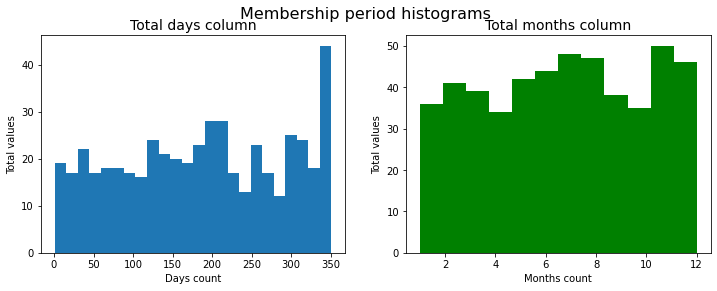

In [29]:
# plot histograms for 'total_days' and 'total_months' in 'users' :

fig, axis = plt.subplots(1,2, figsize = (12,4))
fig.suptitle('Membership period histograms', fontsize = 16)

# total_days histogram
axis[0].hist(df_users.total_days, bins = 24)
axis[0].set_title('Total days column', fontsize = 14)
axis[0].set_xlabel('Days count')
axis[0].set_ylabel('Total values')

# total_months histogram
axis[1].hist(df_users.total_months, bins = 12, color = 'green')
axis[1].set_title('Total months column', fontsize = 14)
axis[1].set_xlabel('Months count')
axis[1].set_ylabel('Total values')

plt.show()

#### <font color = 'blue'>Notes:</font>

Those histograms represent how many many days (or months) was a customer member of the prepaid plan in the reporting period (from 15.1.18 to 31.12.18). I don't see any inconsistencies or irregularities in the data. Both histograms are almost the same, which they should be - total_months column is a direct derivative from total_days, just less detailed. The high peak in the right end of both histograms is easily explained: it doesn't mean there was too many people who participated in plan longer than other, it just means that there was relatively big share of customers who didn't start or end their membership in the middle of the reporting period.

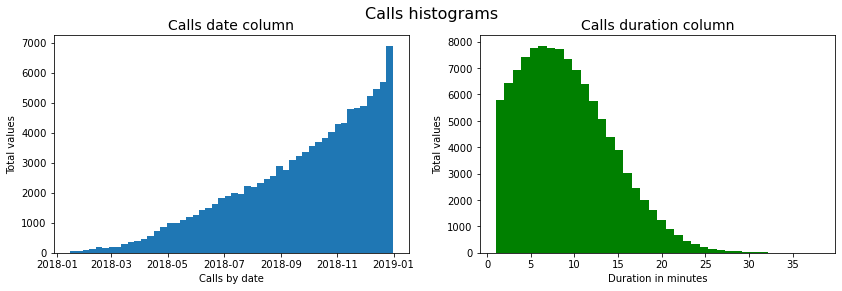

In [30]:
# calls histograms

fig, axis = plt.subplots(1,2, figsize = (14,4))
fig.suptitle('Calls histograms', fontsize = 16)

# calls date histogram
axis[0].hist(calls_updated.call_date, bins = 50)
axis[0].set_title('Calls date column', fontsize = 14)
axis[0].set_xlabel('Calls by date')
axis[0].set_ylabel('Total values')

# calls duration histogram
axis[1].hist(calls_updated.duration, bins = 38, color = 'green')
axis[1].set_title('Calls duration column', fontsize = 14)
axis[1].set_xlabel('Duration in minutes')
axis[1].set_ylabel('Total values')

plt.show()

#### <font color = 'blue'>Notes:</font>

* Total calls amount seems to be positively correlated with date. Maybe both plans were newly declared at a time, and as the time passed, more and more users joined. Or a marketing campaign had place in first quarter of the year. Or both. If I look at membership period histograms, it also shows that there are much more customers who have been members only for part of the year, than customers who have been members for the whole year, which supports this theory.


* Calls duration is totally predictable and looks as it should be (after I adjusted number of bins, considering that all values have been rounded up). The histogram can be described as normal, negatively skewed. Most of the calls seem to have lenght somewhere between 4 and 10 minutes. 

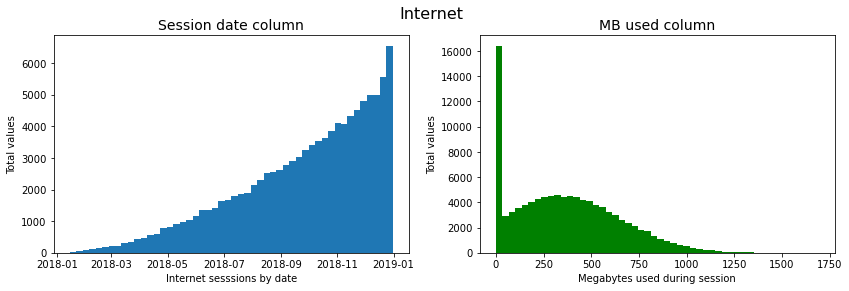

In [31]:
# internet histograms

fig, axis = plt.subplots(1,2, figsize = (14,4))
fig.suptitle('Internet', fontsize = 16)

# session_date histogram
axis[0].hist(internet_updated.session_date, bins = 50)
axis[0].set_title('Session date column', fontsize = 14)
axis[0].set_xlabel('Internet sesssions by date')
axis[0].set_ylabel('Total values')

# mb_used histogram
axis[1].hist(internet_updated.mb_used, bins = 50, color = 'green')
axis[1].set_title('MB used column', fontsize = 14)
axis[1].set_xlabel('Megabytes used during session')
axis[1].set_ylabel('Total values')

plt.show()

#### <font color = 'blue'>Notes:</font>

* Amount of internet sessions histogram looks similar to amount of calls histogram. It also starts from low values and grows as the time passes. 


* Data traffic histogram has high peak at lower values I need to investigate further (especially since individual sessions are not being rounded up when calculating the total month cost). Other than that, this histogram looks quite similar to call duration, but with with wider distribution. If I ignore the peak, most of the values concentrated somewhere around 125 to 625 MB.

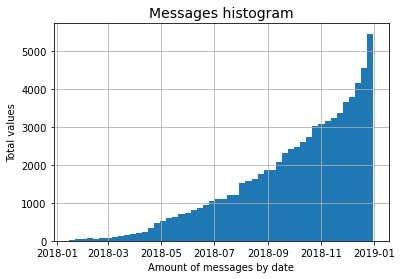

In [32]:
# messages histogram
messages_updated.message_date.hist(bins = 50)
plt.title('Messages histogram', fontsize = 14)
plt.xlabel('Amount of messages by date')
plt.ylabel('Total values')

plt.show()

#### <font color = 'blue'>Notes:</font>

Messages histogram looks consistent as compared to previous histograms. It correlates visually with amount of calls and amount of internet sessions: number of messages also grows over time. I don't see no irregularities here.

In [33]:
# check share of 0 internet traffic values:
internet_updated.query('mb_used == 0').mb_used.count() / len(internet_updated)

0.1311423801574052

#### <font color = 'blue'>Notes:</font>

So I have 13% of 0 values. Now I have to decide, what will distort my further calculations most - keeping those rows or dropping them.

As far as I understood (from googling the issue :)), empty internet session, among other reasons, could emerge when customer tries to get online and access point name (APN) is missing or is not configured correctly. The server still counts it as a session, but the traffic counter for this session equals zero. It happens mostly when customer joins new cell network and tries to surf before configuring internet settings on his device. I believe this reason for origin of those 0 values is also the most rational one, because I also see gradual increase in calls, messages and data sessions which most probably indicate that more and more new users joined the plans trough the year.

Since those 0 values don't included in calculation of plan costs anyway and don't affect revenues, but they can still distort other calculations), I will get rid of them.

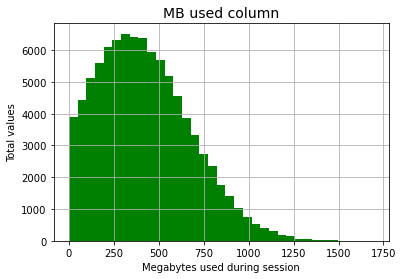

In [34]:
internet_updated.mb_used = internet_updated.query('mb_used > 0').mb_used

# check updated histogram:
internet_updated.mb_used.hist(bins = 35, color = 'green')
plt.title('MB used column', fontsize = 14)
plt.xlabel('Megabytes used during session')
plt.ylabel('Total values')

plt.show()

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

## For each user, find:
* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [35]:
# add month column to calls, messages and internet datasets:

calls_updated['month'] = pd.DatetimeIndex(calls_updated['call_date']).month_name()
messages_updated['month'] = pd.DatetimeIndex(messages_updated['message_date']).month_name()
internet_updated['month'] = pd.DatetimeIndex(internet_updated['session_date']).month_name()

In [36]:
# group calls by user_id and month:
user_calls = calls_updated.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).rename(
    columns={'count':'total_calls', 'sum': 'total_minutes'})

# take a look
user_calls.head()

total_calls  total_minutes
user_id month                               
1000    December           16            124
1001    August             22            182
        December           46            412
        November           49            426
        October            47            393

In [37]:
# group messages by user_id and month:
user_messages = messages_updated.groupby(['user_id', 'month'])['message_date'].agg('count').to_frame().rename(
    columns={'message_date':'total_messages'})

# take a look
user_messages.head()

total_messages
user_id month                   
1000    December              11
1001    August                30
        December              44
        November              36
        October               53

In [38]:
# group internet by user_id and month:
user_internet = internet_updated.groupby(['user_id', 'month'])['mb_used'].agg(['count','sum']).rename(
    columns={'count':'total_sessions', 'sum': 'total_traffic'})

# round up total_traffic values and convert to int:
user_internet['total_traffic'] = user_internet['total_traffic'].apply(math.ceil).astype('int32')

# take a look
user_internet.head()

total_sessions  total_traffic
user_id month                                  
1000    December               4           1902
1001    August                21           6920
        December              53          19370
        November              48          18505
        October               48          22331

In [39]:
# create new table with all users data grouped by months:

users_monthly = user_calls[['total_calls', 'total_minutes']].join(
    user_internet[['total_sessions', 'total_traffic']], how = 'outer').join(
    user_messages['total_messages'], how = 'outer').reset_index(level=[0,1]).merge(
    df_users[['user_id', 'plan']], on = 'user_id', how = 'outer').fillna(0)


# convert numeric columns to int
for column in users_monthly.columns:
    if column in ['plan', 'month']:
        continue
    else:
        users_monthly[column] = users_monthly[column].astype('int32')

# take a look:
users_monthly.head()

,user_id,month,total_calls,total_minutes,total_sessions,total_traffic,total_messages,plan
0,1000,December,16,124,4,1902,11,ultimate
1,1001,August,22,182,21,6920,30,surf
2,1001,December,46,412,53,19370,44,surf
3,1001,November,49,426,48,18505,36,surf
4,1001,October,47,393,48,22331,53,surf


In [40]:
#check if all the users entered the combined dataframe (should be 500):
len(users_monthly.user_id.unique())

500

In [41]:
# check if there are users who didn't use calls, messages and internet at all (and don't have 'month' values):

users_monthly.query('month == 0')

,user_id,month,total_calls,total_minutes,total_sessions,total_traffic,total_messages,plan
2293,1025,0,0,0,0,0,0,ultimate
2294,1129,0,0,0,0,0,0,surf
2295,1143,0,0,0,0,0,0,surf
2296,1269,0,0,0,0,0,0,ultimate
2297,1275,0,0,0,0,0,0,ultimate
2298,1307,0,0,0,0,0,0,surf
2299,1319,0,0,0,0,0,0,surf
2300,1378,0,0,0,0,0,0,surf
2301,1463,0,0,0,0,0,0,ultimate
2302,1473,0,0,0,0,0,0,surf


#### <font color = 'blue'>Notes:</font>

There are 10 of such users out of 500 - only 2%. I don't have a way to know why they didn't use their plans and did they pay monthly fee. It could be some kind of mistake. Anyway, 2% is a relatively small share and I prefer to drop those rows.

In [42]:
users_monthly = users_monthly.query('month != 0')

In [43]:
# function for calculating monthly revenue for each user

def revenue(row):
    plan = row['plan']
    minutes = row['total_minutes']
    messages = row['total_messages']
    traffic = row['total_traffic']
    
    if plan == 'surf':
        total = 20 # monthly cost of the plan
        
        # check additional costs of calls
        if minutes > 500: 
            total += (minutes - 500) * 0.03
        # check additional cost of the messages
        if messages > 50: 
            total += (messages - 50) * 0.03
        # check additional cost of traffic
        if traffic > 15360:
            total += math.ceil((traffic - 15360) / 1024) * 10
        return total
    
    else:
        total = 70
        
        # check additional costs of calls
        if minutes > 3000: 
            total += (minutes - 3000) * 0.01
        # check additional cost of the messages
        if messages > 1000: 
            total += (messages - 1000) * 0.01
        # check additional cost of traffic
        if traffic > 30720:
            total += math.ceil((traffic - 30720) / 1024) * 7
        return total      

In [44]:
# check how function works:

print('Monthly cost for row 1:', revenue(users_monthly.loc[1])) # answer should be 20
print('Monthly cost for row 2:', revenue(users_monthly.loc[2])) # answer should be 60
print('Monthly cost for row 0:', revenue(users_monthly.loc[0])) # answer should be 70
print('Monthly cost for row 19:', revenue(users_monthly.loc[19])) # answer should be 84

Monthly cost for row 1: 20
Monthly cost for row 2: 60
Monthly cost for row 0: 70
Monthly cost for row 19: 84


In [45]:
# add column with average monthly revenue per user:
users_monthly['revenue'] = users_monthly.apply(revenue, axis = 1).astype('int32')

# take a look
users_monthly.head()

,user_id,month,total_calls,total_minutes,total_sessions,total_traffic,total_messages,plan,revenue
0,1000,December,16,124,4,1902,11,ultimate,70
1,1001,August,22,182,21,6920,30,surf,20
2,1001,December,46,412,53,19370,44,surf,60
3,1001,November,49,426,48,18505,36,surf,60
4,1001,October,47,393,48,22331,53,surf,90


<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

# Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [46]:
# description of categorical columns:
users_monthly.describe(include = 'object')

,month,plan
count,2293,2293
unique,12,2
top,December,surf
freq,469,1573


In [47]:
# description of numerical columns:
users_monthly.describe().astype('int32')

,user_id,total_calls,total_minutes,total_sessions,total_traffic,total_messages,revenue
count,2293,2293,2293,2293,2293,2293,2293
mean,1246,48,429,39,16764,33,64
std,143,26,236,17,7967,34,46
min,1000,0,0,0,0,0,20
25%,1122,30,265,30,12236,3,23
50%,1245,48,425,41,16831,26,70
75%,1368,64,572,50,21000,51,70
max,1499,167,1510,123,70932,266,590


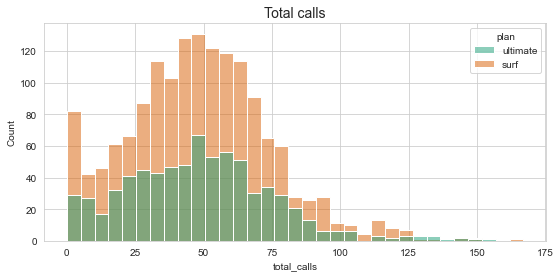

The means are: 
 plan
surf        48.237127
ultimate    48.644444
Name: total_calls, dtype: float64

--------------------

The standard deviations are: 
 plan
surf        25.927288
ultimate    26.811166
Name: total_calls, dtype: float64

--------------------

The coefficients of variation are: 
 plan
surf        0.537497
ultimate    0.551166
Name: total_calls, dtype: float64




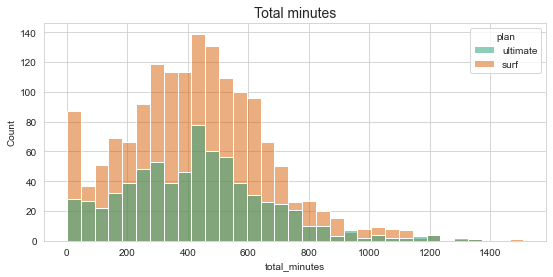

The means are: 
 plan
surf        428.749523
ultimate    430.450000
Name: total_minutes, dtype: float64

--------------------

The standard deviations are: 
 plan
surf        234.453150
ultimate    240.508762
Name: total_minutes, dtype: float64

--------------------

The coefficients of variation are: 
 plan
surf        0.546830
ultimate    0.558738
Name: total_minutes, dtype: float64




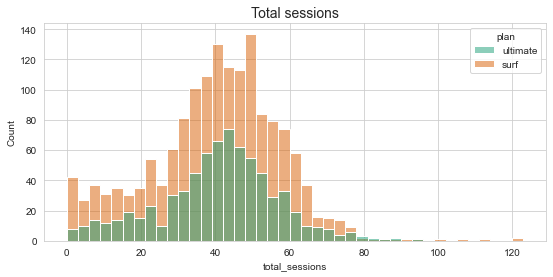

The means are: 
 plan
surf        39.465353
ultimate    40.276389
Name: total_sessions, dtype: float64

--------------------

The standard deviations are: 
 plan
surf        17.478510
ultimate    16.107169
Name: total_sessions, dtype: float64

--------------------

The coefficients of variation are: 
 plan
surf        0.442882
ultimate    0.399916
Name: total_sessions, dtype: float64




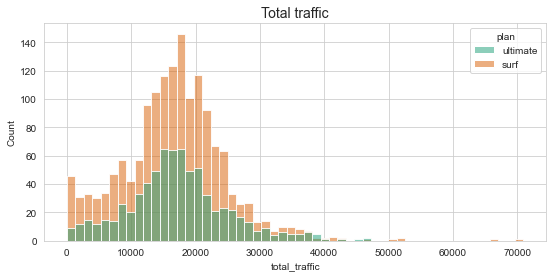

The means are: 
 plan
surf        16558.776860
ultimate    17215.202778
Name: total_traffic, dtype: float64

--------------------

The standard deviations are: 
 plan
surf        8013.516423
ultimate    7851.886627
Name: total_traffic, dtype: float64

--------------------

The coefficients of variation are: 
 plan
surf        0.483944
ultimate    0.456102
Name: total_traffic, dtype: float64




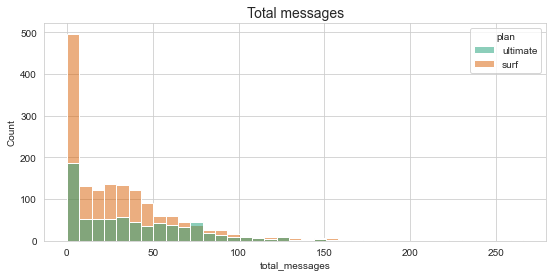

The means are: 
 plan
surf        31.159568
ultimate    37.551389
Name: total_messages, dtype: float64

--------------------

The standard deviations are: 
 plan
surf        33.566717
ultimate    34.767179
Name: total_messages, dtype: float64

--------------------

The coefficients of variation are: 
 plan
surf        1.077252
ultimate    0.925856
Name: total_messages, dtype: float64




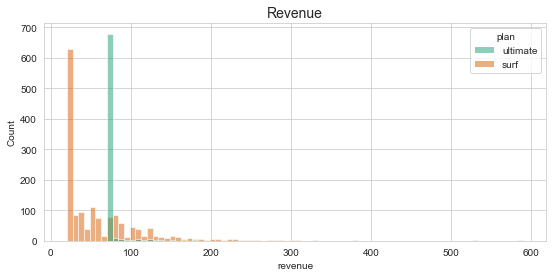

The means are: 
 plan
surf        60.479975
ultimate    72.313889
Name: revenue, dtype: float64

--------------------

The standard deviations are: 
 plan
surf        55.333092
ultimate    11.395108
Name: revenue, dtype: float64

--------------------

The coefficients of variation are: 
 plan
surf        0.914899
ultimate    0.157578
Name: revenue, dtype: float64




In [48]:
for column in users_monthly.columns:
    # exclude categorical columns
    if column in ['user_id', 'plan', 'month']:
        continue
    else:
        # plot histogram for all the relevant columns
        sns.set_style("whitegrid")
        plt.figure(figsize = (9,4))
        sns.histplot(users_monthly, x = column, hue = 'plan', palette = 'Dark2').set_title(
            column.replace('_', ' ').capitalize(), fontsize = 14)
        plt.show()
        
        # mean, dispersion and standard deviation by plan for relevant columns:
        print('The means are: \n', users_monthly.groupby('plan')[column].mean()) 
        print('\n--------------------\n')
        print('The standard deviations are: \n', users_monthly.groupby('plan')[column].std())
        print('\n--------------------\n')
        print('The coefficients of variation are: \n', 
              users_monthly.groupby('plan')[column].std() / users_monthly.groupby('plan')[column].mean())
        print()
        print()

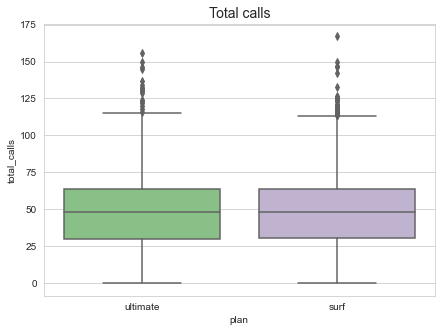

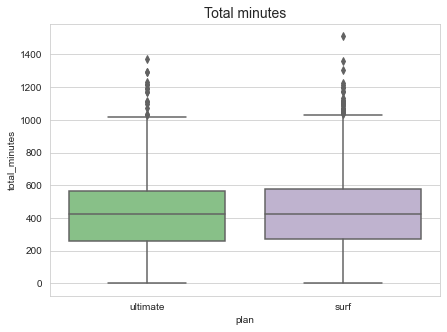

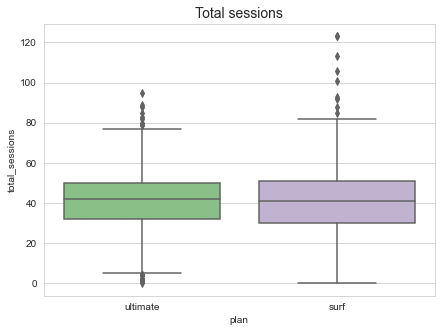

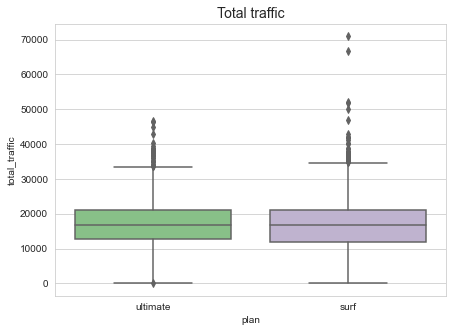

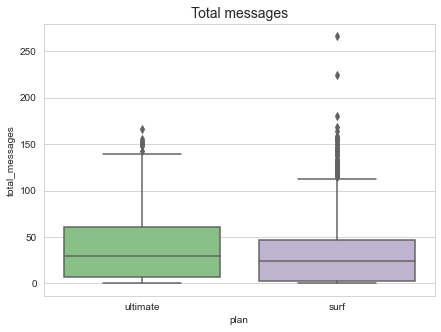

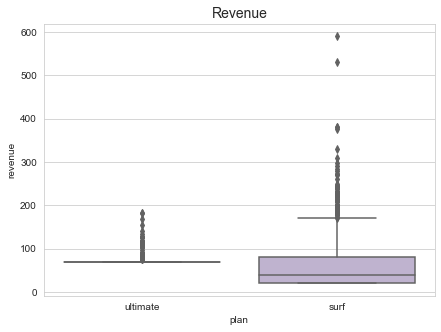

In [49]:
# boxplot for each of the above columns:
for column in users_monthly.columns:
    # exclude columns I don't need to analyze
    if column in ['user_id', 'plan', 'month']:
        continue
    else:
        fig, ax = plt.subplots(figsize=(7,5))
        ax = sns.boxplot(x = 'plan', y = column, data = users_monthly, palette = "Accent")
        ax.set_title(column.replace('_', ' ').capitalize(), fontsize = 14)

#### <font color = 'blue'>Notes</font>

Most of the users (339 out of 500) are subscribed to 'surf' plan, which is why overall values for 'surf' are higher almost everywhere. 'Surf' monthly cost is much cheaper, so it looks reasonable for most of the users to choose this plan.

 * **Calls**: 
     * **Distributions**: both average monthly calls and average monthly minutes histograms are normal, but positively skewed. 
       <br>Values in calls are ranging between 0 and 100 calls a month, with most of the values placed between 25 and 75. 
       <br>Values in minutes are ranging between 0 and 1200 minutes, with most of the values placed between 0 and 700.
       <br>There is also a peak at the low values - there is significant amount of users who prefer not to call or to make very few calls a month.
     * **Users' behavior**: In terms of amount and length of calls users habits are almost the same: average monthly values per user, standard deviation, mean and cv's values are almost similar. In 'ultimate' plan I can see outliers with higher values, which is rational for a plan that includes larger minutes pack. In both plans the typical user makes roughly 25 to 55 calls a month, and spends between 250 and 590 minutes talking. 
     
 
 * **Internet**: 
     * **Distributions**: both sessions and traffic distributions are normal, positively skewed, with small peak at the small values.
       <br>Values in sessions are ranging between 0 and 80, with most of the values placed between 25 and 60.
       <br>Values in data traffic are ranging between 0 and 40k, with most of the values placed between 10 and 25k.
     * **Users' behavior**: internet usage behavior is also looks quite similar for both plans. In both plans the typical user connects to the internet roughly 30 to 50 times a month, and uses 12,000-21,000 mb of data traffic.


 * **Messages**: 
     * **Distributions**: the distribution doesn't look normal, but has quite consistent negative correlation between amount of users and amount of messages. Also this histogram has very high peak at 0 values (which is understandable: most people prefer messengers over 'traditional' sms services). Most of the users send up to 100 messages per month, with main concentration of values lying between 0 and 50 messages.
     * **Users' behavior**: there are slightly more monthly messages per 'ultimate' user, than per 'surf' one, which is also should be explained by larger amount of messages included in 'ultimate' plan. An average user sends up to 50-60 messages per month.
     
     
 * **Revenue**: although 'Ultimate's mean is larger than 'Surf's, boxplots show that if we count the outliers off, 'Surf' users have larger monthly payment in average, and also a larger maximum. Also the 'Ultimate' plan is much more homogenous, with almost all of the values concentrated around basic plan cost, which is 70. However, 'Surf' plan values are much more scattered and have larger variance overall. While average 'Ultimate' customer pays 70 usd per month (and, due to boxplot, all the payments over 70 should be considered outliers), average 'Surf' customer - which has almost identical behavior and customer habits - pays 20 to 80 usd, with upper whisker nearly reaching 200 usd, before the outliers start.
 
<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:) 

# Step 4. Test the hypotheses
* The average revenue from users of Ultimate and Surf calling plans differs.
* The average revenue from users in NY-NJ area is different from that of the users from other regions.


You decide what alpha value to use.

#### <font color = 'blue'>Null hypothesis (H0) 1:  the expected average revenue for both plan is equal.</font>
**Alternate hypothesis (H1) 1: the expected average revenue for both plans is not equal.**

In [50]:
# prepare datasets for comparison
ultimate_revenue = users_monthly.query('plan == "ultimate"')['revenue']
surf_revenue = users_monthly.query('plan == "surf"')['revenue']

# check the result
print(ultimate_revenue.head())
print()
print(surf_revenue.head())

0     70
19    84
20    70
26    70
27    70
Name: revenue, dtype: int32

1    20
2    60
3    60
4    90
5    20
Name: revenue, dtype: int32


In [51]:
# check variances
np.var(ultimate_revenue) / np.var(surf_revenue)

0.04237791553073127

In [52]:
# calculate pvalue; variances differ greatly, so equal_var = False
pvalue1 = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var = False).pvalue

# check null hypothesis:
alpha1 = 0.05
if pvalue1 > alpha1:
    print('The hypothesis cannot be rejected. There is not enough evidence to determine that the samples means are not equal.')
else:
    print('Reject H0. Average revenues of "Surf" and "Ultimate" plans are not equal.')

Reject H0. Average revenues of "Surf" and "Ultimate" plans are not equal.


#### <font color = 'blue'>Null hypothesis (H0) 2:  The expected average revenue from users in NY-NJ area is equal to that of the users from other regions.</font>
**Alternate hypothesis (H1) 2: The expected average revenue from users in those areas is not equal to that of the users from other regions**

In [53]:
# check again users dataset:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_days,total_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,8,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,141,5
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,72,3
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,338,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,223,8


In [54]:
# check if there are more than one value that contains str 'New York' in 'city' column:

# set for unique values that contain 'New York':
new_york_set = set({})

for value in df_users.city:
    if 'New York' in value:
        new_york_set.add(value)

new_york_set

{'New York-Newark-Jersey City, NY-NJ-PA MSA'}

In [55]:
# I have only one value for New York, no duplicates.

# add revenues to df_users set (I could also add cities to users_monthly set, but it looks too nice with all those numbers):
df_users = df_users.merge(users_monthly[['user_id', 'revenue']], on = 'user_id')

# check the result:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int32         
 1   first_name    2293 non-null   object        
 2   last_name     2293 non-null   object        
 3   age           2293 non-null   int32         
 4   city          2293 non-null   object        
 5   reg_date      2293 non-null   datetime64[ns]
 6   plan          2293 non-null   object        
 7   churn_date    2293 non-null   datetime64[ns]
 8   total_days    2293 non-null   int32         
 9   total_months  2293 non-null   int32         
 10  revenue       2293 non-null   int32         
dtypes: datetime64[ns](2), int32(5), object(4)
memory usage: 170.2+ KB


In [56]:
# create two datasets, NY-NJ-PA and others.

ny_revenues = df_users.query('city =="New York-Newark-Jersey City, NY-NJ-PA MSA"').revenue
other_cities_revenues = df_users.query('city !="New York-Newark-Jersey City, NY-NJ-PA MSA"').revenue

# check the datasets:
print(ny_revenues.head())
print()
print(other_cities_revenues.head())

56    38
57    20
75    83
76    52
77    20
Name: revenue, dtype: int32

0    70
1    20
2    60
3    60
4    90
Name: revenue, dtype: int32


In [57]:
# check variances:
np.var(ny_revenues) / np.var(other_cities_revenues)

0.8502480936335127

In [58]:
# calculate pvalue; variances are quite alike, so equal_var = True
pvalue2 = st.ttest_ind(ny_revenues, other_cities_revenues, equal_var = True).pvalue

# check null hypothesis:
alpha1 = 0.05
if pvalue1 > alpha1:
    print('The hypothesis cannot be rejected. There is not enough evidence to determine that the samples estimated means are not equal.')
else:
    print('Reject H0. Average revenues estimated means for NY-NJ and for other cities are not equal')

Reject H0. Average revenues estimated means for NY-NJ and for other cities are not equal


## Explain:
1. How you formulated the null and alternative hypotheses.
2. What criterion you used to test the hypotheses and why.

#### <font color = 'blue'>Answers:</font>
1. To find empirical evidence if the revenues for two plans and for NY-NJ and other cities differ, I formulated null hypothesis that the revenues in both cases are equal, and the alternate one - that it is wrong and the revenues differ. 
2. In case of two different plans, I tested the hypotheses with ttest_ind method, and passed into it 'equal_var = False', because both datasets had different variances. For difference by region, I chose to pass 'equal_var = True', because the variances was almost the same.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

# Step 5. Write an overall conclusion

#### <font color = 'blue'>Description of work process:</font>


In this project I received few data files from cell company, which contained data for 500 sample customers. Based on those samples, my task was to evaluate two prepaid plans and carry out a preliminary analysis to determine which of the plans brings in more revenue.


After importing and examining the datasets, I preprocessed the data:
* I checked over what period the data extends, found period's first and last dates. With the help of those dates I calculated the exact membership length in months (rounded up) for each user, during the reference period. This crucial piece of data later helped me to calculate average monthly payment of every customer.
* I checked datasets for 'zeroed' calls which I believe to be missed. Because those calls won't contribute in any way to my analysis and won't affect revenues, I dropped those rows.
* Later, during graphical analysis, I also found 'zeroed' data sessions which I believe emerged when customers tried to get online with wrong data nework settings. Those values also wasn't useful in any way, but could be potentially harmful, so I dropped them too. 


While conducting graphical analysis, I found that during the reference period amount of customers (and therefore usage of different cell network services) increased steadily during the time. 

Then I extracted means and overall uses of different services by user into pivot tables, and merged them into one table which contained almost all the data I needed: for each user, it listed average monthly amount and length of calls, amount and used traffic of internet sessions, and amount of messages. Then with the help of outside function I added column which listed average monthly revenue for each user.

After analyzing the data and describing user's behaviors, I tested two main theories: whether expected average monthly revenues differ by plans, and whether they differ in NY-NJ region and in other places. 

#### <font color = 'blue'>Based on my findings, this preliminary research conclusions are:</font>
1. The revenues for both plans are different. I also believe the revenue for 'surf' plan is expected to be greater than revenue for 'ultimate', which is supported by overall user's behavior and conclusions I reached in part 3 of the project. Anyway, additional research on larger sample is obviously needed.
2. The revenues also differ by geographical area: revenues for NY-NJ area differ from revenues in all other areas. 
3. If and when more broad research will be conducted, the revenues for each plan should be also checked by main areas, to see if customer behavior - and revenues - also differ between both plans depending on geography.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)